<a href="https://colab.research.google.com/github/prabuarjunan/AI-ML-NFL-Dataset/blob/master/NFL_Data_Analysis_PA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
autosave 60

Autosaving every 60 seconds


In [65]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [66]:
#installing geopandas
#!pip install --upgrade geopandas

In [67]:
#importing packages for data analysis
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
#import geopandas as gpd
import matplotlib.pyplot as plt

In [68]:
#set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [69]:
#run this cell to mount your Google drive to the notebook; you need to give it access to your SCU Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#you will need to copy the pathway to whatever data you want to access
#df  = pd.read_csv('/content/drive/Shareddrives/Python_NFL_Project/Basic_Stats.csv', index_col=10)
df1  = pd.read_csv('/content/drive/Shareddrives/Python_NFL_Project/Game_Logs_Quarterback.csv', index_col=1)

In [71]:
df1.head(5)

,Player Id,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,Score,Games Played,Games Started,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,1,08/11,Home,CHI,L,19 to 20,0,0,--,--,--,--,--,--,--,--,--,0.00,--,--,--,--,--,--
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,2,08/18,Away,ARI,W,33 to 20,1,0,1,4,25.0,19,4.8,0,0,0,0,46.90,--,--,--,--,--,--
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,3,08/25,Home,DAL,W,28 to 16,0,0,--,--,--,--,--,--,--,--,--,0.00,--,--,--,--,--,--
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,4,08/30,Away,TB,L,24 to 31,1,0,12,22,54.5,117,5.3,0,1,2,13,50.80,2,17,8.5,0,--,--
"Demory, Bill",billdemory/2512778,NaN,1974,Regular Season,1,09/15,Away,KC,L,16 to 24,0,--,--,--,--,--,--,--,--,--,--,0.00,--,--,--,--,--,--


In [72]:
print('Number of Rows in Basic_Stats.csv: ' + str(len(df1)))

Number of Rows in Basic_Stats.csv: 40247


In [73]:
#description of the missing values
df1.isna().sum()

Player Id                        0
Position                     30153
Year                             0
Season                           0
Week                             0
Game Date                        0
Home or Away                     0
Opponent                         0
Outcome                          0
Score                            0
Games Played                     0
Games Started                    0
Passes Completed                 0
Passes Attempted                 0
Completion Percentage            0
Passing Yards                    0
Passing Yards Per Attempt        0
TD Passes                        0
Ints                             0
Sacks                            0
Sacked Yards Lost                0
Passer Rating                    0
Rushing Attempts                 0
Rushing Yards                    0
Yards Per Carry                  0
Rushing TDs                      0
Fumbles                          0
Fumbles Lost                     0
dtype: int64

In [74]:
#of missing values
df1.isna().sum().sum()

30153

In [75]:
df1.describe()
df1.info()

,Year,Week,Games Played,Passer Rating
count,40247.00,40247.00,40247.00,40247.00
mean,1998.02,8.64,0.57,39.20
std,13.46,5.35,0.49,45.55
min,1970.00,0.00,0.00,0.00
25%,1987.00,4.00,0.00,0.00
50%,2001.00,8.00,1.00,0.00
75%,2010.00,13.00,1.00,78.90
max,2016.00,23.00,1.00,158.30


<class 'pandas.core.frame.DataFrame'>
Index: 40247 entries, Zabransky, Jared to Ramsey, Steve
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Id                  40247 non-null  object 
 1   Position                   10094 non-null  object 
 2   Year                       40247 non-null  int64  
 3   Season                     40247 non-null  object 
 4   Week                       40247 non-null  int64  
 5   Game Date                  40247 non-null  object 
 6   Home or Away               40247 non-null  object 
 7   Opponent                   40247 non-null  object 
 8   Outcome                    40247 non-null  object 
 9   Score                      40247 non-null  object 
 10  Games Played               40247 non-null  int64  
 11  Games Started              40247 non-null  object 
 12  Passes Completed           40247 non-null  object 
 13  Passes Attempted           4

In [81]:
#exploring the age parameter
#df.Age.nlargest(50)
#df1.head(5)
att = df1['Passes Attempted']
com = df1['Passes Completed']
(df1['Passes Completed'] == '--').head()
df1.loc[df1['Passes Completed'] == '--', 'Passes Completed'] = 0
com1 = df1.replace(to_replace='--', value=0, inplace=True)
df1
(df1['Passes Completed'].head(1))


df1.info()

Name
Zabransky, Jared    False
Zabransky, Jared    False
Zabransky, Jared    False
Zabransky, Jared    False
Demory, Bill        False
Name: Passes Completed, dtype: bool

,Player Id,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,Score,Games Played,Games Started,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,1,08/11,Home,CHI,L,19 to 20,0,0,0.00,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,2,08/18,Away,ARI,W,33 to 20,1,0,1.00,4.00,25.0,19,4.8,0,0,0,0,46.90,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,3,08/25,Home,DAL,W,28 to 16,0,0,0.00,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,4,08/30,Away,TB,L,24 to 31,1,0,12.00,22.00,54.5,117,5.3,0,1,2,13,50.80,2,17,8.5,0,0,0
"Demory, Bill",billdemory/2512778,NaN,1974,Regular Season,1,09/15,Away,KC,L,16 to 24,0,0,0.00,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ramsey, Steve",steveramsey/2523725,NaN,1971,Regular Season,12,12/05,Home,CHI,W,6 to 3,1,0,8.00,16.00,50.0,81,5.1,0,2,3,27,25.30,2,0,0.0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,1971,Regular Season,13,12/12,Away,SD,L,17 to 45,1,0,10.00,25.00,40.0,169,6.8,1,3,1,6,37.30,0,0,0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,1971,Regular Season,14,12/19,Away,OAK,L,13 to 21,1,0,16.00,38.00,42.1,205,5.4,1,1,2,13,57.50,1,6,6.0,0,0,0


Name
Zabransky, Jared   0.00
Name: Passes Completed, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 40247 entries, Zabransky, Jared to Ramsey, Steve
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Id                  40247 non-null  object 
 1   Position                   10094 non-null  object 
 2   Year                       40247 non-null  int64  
 3   Season                     40247 non-null  object 
 4   Week                       40247 non-null  int64  
 5   Game Date                  40247 non-null  object 
 6   Home or Away               40247 non-null  object 
 7   Opponent                   40247 non-null  object 
 8   Outcome                    40247 non-null  object 
 9   Score                      40247 non-null  object 
 10  Games Played               40247 non-null  int64  
 11  Games Started              40247 non-null  object 
 12  Passes Completed           40247 non-null  float64
 13  Passes Attempted           4

In [82]:
df1['Passes Completed'] = df1['Passes Completed'].astype(str).astype(float)
df1['Passes Attempted'] = df1['Passes Attempted'].astype(str).astype(float)
com = df1['Passes Completed']
a = ((com/att)-0.3)*5
#df1.info()
#a = com/att 
a


Name
Zabransky, Jared     NaN
Zabransky, Jared   -0.25
Zabransky, Jared     NaN
Zabransky, Jared    1.23
Demory, Bill         NaN
                    ... 
Ramsey, Steve       1.00
Ramsey, Steve       0.50
Ramsey, Steve       0.61
Ramsey, Steve        NaN
Ramsey, Steve      -1.50
Length: 40247, dtype: float64

In [83]:
df1['Passing Yards'] = df1['Passing Yards'].astype(str).astype(float)
yds = df1['Passing Yards']
b = (((yds/att)-3)*0.25)
b


Name
Zabransky, Jared     NaN
Zabransky, Jared    0.44
Zabransky, Jared     NaN
Zabransky, Jared    0.58
Demory, Bill         NaN
                    ... 
Ramsey, Steve       0.52
Ramsey, Steve       0.94
Ramsey, Steve       0.60
Ramsey, Steve        NaN
Ramsey, Steve      -0.75
Length: 40247, dtype: float64

In [84]:
df1['TD Passes'] = df1['TD Passes'].astype(str).astype(float)
td = df1['TD Passes']
c = ((td/att)*20)
c

Name
Zabransky, Jared    NaN
Zabransky, Jared   0.00
Zabransky, Jared    NaN
Zabransky, Jared   0.00
Demory, Bill        NaN
                   ... 
Ramsey, Steve      0.00
Ramsey, Steve      0.80
Ramsey, Steve      0.53
Ramsey, Steve       NaN
Ramsey, Steve      0.00
Length: 40247, dtype: float64

In [85]:
df1['Ints'] = df1['Ints'].astype(str).astype(float)
ints = df1['Ints']
d = (2.375-((ints/att)*25))
d

Name
Zabransky, Jared     NaN
Zabransky, Jared    2.38
Zabransky, Jared     NaN
Zabransky, Jared    1.24
Demory, Bill         NaN
                    ... 
Ramsey, Steve      -0.75
Ramsey, Steve      -0.62
Ramsey, Steve       1.72
Ramsey, Steve        NaN
Ramsey, Steve       2.38
Length: 40247, dtype: float64

In [86]:
QBRating_latest = ((a+b+c+d)/6)*100
QBRating_latest
QBRating_latest.sort_values()
#df1 = df1[df1.index.duplicated()]
df1

Name
Zabransky, Jared     NaN
Zabransky, Jared   42.71
Zabransky, Jared     NaN
Zabransky, Jared   50.76
Demory, Bill         NaN
                    ... 
Ramsey, Steve      12.76
Ramsey, Steve      26.92
Ramsey, Steve      57.46
Ramsey, Steve        NaN
Ramsey, Steve       2.08
Length: 40247, dtype: float64

Name
Weeden, Brandon   -414.58
Johnson, Rob      -414.58
Anderson, Derek   -414.58
Favre, Brett      -414.58
Philcox, Todd     -414.58
                    ...  
Ramsey, Steve         NaN
Ramsey, Steve         NaN
Ramsey, Steve         NaN
Ramsey, Steve         NaN
Ramsey, Steve         NaN
Length: 40247, dtype: float64

,Player Id,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,Score,Games Played,Games Started,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,1,08/11,Home,CHI,L,19 to 20,0,0,0.00,0.00,0,0.00,0,0.00,0.00,0,0,0.00,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,2,08/18,Away,ARI,W,33 to 20,1,0,1.00,4.00,25.0,19.00,4.8,0.00,0.00,0,0,46.90,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,3,08/25,Home,DAL,W,28 to 16,0,0,0.00,0.00,0,0.00,0,0.00,0.00,0,0,0.00,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,2007,Preseason,4,08/30,Away,TB,L,24 to 31,1,0,12.00,22.00,54.5,117.00,5.3,0.00,1.00,2,13,50.80,2,17,8.5,0,0,0
"Demory, Bill",billdemory/2512778,NaN,1974,Regular Season,1,09/15,Away,KC,L,16 to 24,0,0,0.00,0.00,0,0.00,0,0.00,0.00,0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ramsey, Steve",steveramsey/2523725,NaN,1971,Regular Season,12,12/05,Home,CHI,W,6 to 3,1,0,8.00,16.00,50.0,81.00,5.1,0.00,2.00,3,27,25.30,2,0,0.0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,1971,Regular Season,13,12/12,Away,SD,L,17 to 45,1,0,10.00,25.00,40.0,169.00,6.8,1.00,3.00,1,6,37.30,0,0,0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,1971,Regular Season,14,12/19,Away,OAK,L,13 to 21,1,0,16.00,38.00,42.1,205.00,5.4,1.00,1.00,2,13,57.50,1,6,6.0,0,0,0


In [87]:
df1.insert(2,"QBRating_latest", QBRating_latest)
#df1.isna().sum().sum()
#QBRating_latest_series = df1['QBRating_latest']
#QBRating_latest_series.dropna(inplace=False)
#df1['QBRating_latest'].dropna(inplace=True)
df1
df1.dropna(subset=['QBRating_latest'], how='all', inplace=True)
df1



,Player Id,Position,QBRating_latest,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,Score,Games Played,Games Started,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Zabransky, Jared",jaredzabransky/2495791,NaN,NaN,2007,Preseason,1,08/11,Home,CHI,L,19 to 20,0,0,0.00,0.00,0,0.00,0,0.00,0.00,0,0,0.00,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,42.71,2007,Preseason,2,08/18,Away,ARI,W,33 to 20,1,0,1.00,4.00,25.0,19.00,4.8,0.00,0.00,0,0,46.90,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,NaN,2007,Preseason,3,08/25,Home,DAL,W,28 to 16,0,0,0.00,0.00,0,0.00,0,0.00,0.00,0,0,0.00,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,50.76,2007,Preseason,4,08/30,Away,TB,L,24 to 31,1,0,12.00,22.00,54.5,117.00,5.3,0.00,1.00,2,13,50.80,2,17,8.5,0,0,0
"Demory, Bill",billdemory/2512778,NaN,NaN,1974,Regular Season,1,09/15,Away,KC,L,16 to 24,0,0,0.00,0.00,0,0.00,0,0.00,0.00,0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ramsey, Steve",steveramsey/2523725,NaN,12.76,1971,Regular Season,12,12/05,Home,CHI,W,6 to 3,1,0,8.00,16.00,50.0,81.00,5.1,0.00,2.00,3,27,25.30,2,0,0.0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,26.92,1971,Regular Season,13,12/12,Away,SD,L,17 to 45,1,0,10.00,25.00,40.0,169.00,6.8,1.00,3.00,1,6,37.30,0,0,0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,57.46,1971,Regular Season,14,12/19,Away,OAK,L,13 to 21,1,0,16.00,38.00,42.1,205.00,5.4,1.00,1.00,2,13,57.50,1,6,6.0,0,0,0


,Player Id,Position,QBRating_latest,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,Score,Games Played,Games Started,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Zabransky, Jared",jaredzabransky/2495791,NaN,42.71,2007,Preseason,2,08/18,Away,ARI,W,33 to 20,1,0,1.00,4.00,25.0,19.00,4.8,0.00,0.00,0,0,46.90,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,50.76,2007,Preseason,4,08/30,Away,TB,L,24 to 31,1,0,12.00,22.00,54.5,117.00,5.3,0.00,1.00,2,13,50.80,2,17,8.5,0,0,0
"Demory, Bill",billdemory/2512778,NaN,-119.58,1973,Regular Season,4,10/07,Away,MIA,L,3 to 31,1,0,2.00,5.00,40.0,14.00,2.8,0.00,2.00,1,4,8.30,0,0,0,0,0,0
"Demory, Bill",billdemory/2512778,NaN,20.54,1973,Regular Season,5,10/14,Away,NE,W,9 to 7,1,0,1.00,7.00,14.3,11.00,1.6,0.00,0.00,1,11,39.60,2,0,0.0,0,0,0
"Demory, Bill",billdemory/2512778,NaN,-2.36,1973,Regular Season,6,10/21,Away,PIT,L,14 to 26,1,0,6.00,15.00,40.0,84.00,5.6,1.00,3.00,4,38,41.40,2,-1,-0.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ramsey, Steve",steveramsey/2523725,NaN,58.92,1971,Regular Season,11,11/28,Away,PIT,W,22 to 10,1,0,14.00,25.00,56.0,161.00,6.4,0.00,1.00,2,11,58.90,0,0,0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,12.76,1971,Regular Season,12,12/05,Home,CHI,W,6 to 3,1,0,8.00,16.00,50.0,81.00,5.1,0.00,2.00,3,27,25.30,2,0,0.0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,26.92,1971,Regular Season,13,12/12,Away,SD,L,17 to 45,1,0,10.00,25.00,40.0,169.00,6.8,1.00,3.00,1,6,37.30,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Player Id,Position,QBRating_latest,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,Score,Games Played,Games Started,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Zabransky, Jared",jaredzabransky/2495791,NaN,42.71,2007,Preseason,2,08/18,Away,ARI,W,33 to 20,1,0,1.00,4.00,25.0,19.00,4.8,0.00,0.00,0,0,46.90,0,0,0,0,0,0
"Zabransky, Jared",jaredzabransky/2495791,NaN,50.76,2007,Preseason,4,08/30,Away,TB,L,24 to 31,1,0,12.00,22.00,54.5,117.00,5.3,0.00,1.00,2,13,50.80,2,17,8.5,0,0,0
"Demory, Bill",billdemory/2512778,NaN,0.00,1973,Regular Season,4,10/07,Away,MIA,L,3 to 31,1,0,2.00,5.00,40.0,14.00,2.8,0.00,2.00,1,4,8.30,0,0,0,0,0,0
"Demory, Bill",billdemory/2512778,NaN,20.54,1973,Regular Season,5,10/14,Away,NE,W,9 to 7,1,0,1.00,7.00,14.3,11.00,1.6,0.00,0.00,1,11,39.60,2,0,0.0,0,0,0
"Demory, Bill",billdemory/2512778,NaN,0.00,1973,Regular Season,6,10/21,Away,PIT,L,14 to 26,1,0,6.00,15.00,40.0,84.00,5.6,1.00,3.00,4,38,41.40,2,-1,-0.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ramsey, Steve",steveramsey/2523725,NaN,58.92,1971,Regular Season,11,11/28,Away,PIT,W,22 to 10,1,0,14.00,25.00,56.0,161.00,6.4,0.00,1.00,2,11,58.90,0,0,0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,12.76,1971,Regular Season,12,12/05,Home,CHI,W,6 to 3,1,0,8.00,16.00,50.0,81.00,5.1,0.00,2.00,3,27,25.30,2,0,0.0,0,0,0
"Ramsey, Steve",steveramsey/2523725,NaN,26.92,1971,Regular Season,13,12/12,Away,SD,L,17 to 45,1,0,10.00,25.00,40.0,169.00,6.8,1.00,3.00,1,6,37.30,0,0,0,0,0,0


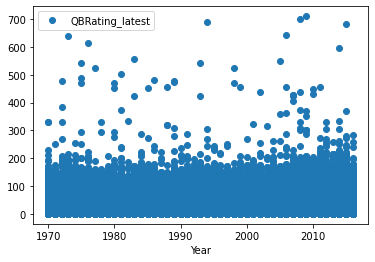

In [88]:
df1['QBRating_latest'][df1['QBRating_latest'] < 0] = 0
df1
df1.plot(x='Year', y='QBRating_latest', style='o')